<img style="float: left; padding-right: 20px; width: 70px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> 

**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-2**<br>
**Profesor:** Paula Andrea Aguirre Aparicio <br>

----
<div style="background-color:#fffff;">
    <br>
    <p style="text-align:center;font-family:Times New Roman;color:black;font-size:20pt;font-weight:bold;margin:20px">
        Proyecto Introduccion Ciencia de Datos: Relación entre arrestos de
personas de distintas razas y la
cantidad de arrestos por estado en EEUU, entre 2018 y  2020.
    </p>
    <p style="text-align:center;font-family:Times New Roman;color:black;font-size:20pt;font-weight:bold;margin:20px">
        Álgebra lineal para ciencia de datos
    </p>
    <p style="text-align:center;font-family:Times New Roman;color:black;font-size:16pt;margin:20px">
        Eduardo Andres Alvarez Franco - Fernanda Bley De Barbieri - Joaquín Alonso Cabello Parra - Julián Vargas Jarkowiec
        <br>13 de diciembre de 2021
        <br>
        <br><br><b>
    </p>
    <br><br>
</div>

Librerias importadas:

In [124]:
import pandas as pd
import geopandas as gpd
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Descarga de tablas de informacion de arrestos por cada año

In [125]:
# https://www.fbi.gov/services/cjis/ucr/publications : Dataframe (18, 19) * las del 2020 esta solo el dataframe por raza
# 29 Numero de arrestos por ofensa
# 43- 49 - 55 - 61 - 67 numero de arrestos por raza
# 69 numero de arrestos por estado sobre/bajo 18 años

import requests
import os
lista_anos = [2019,2018,2017]
lista_numeros_tablas = [29, '55a' ,69]

try:
    for ano in lista_anos:
        os.makedirs(f'Data_fbi_ucr/{ano}_datos')
        for num_tabla in lista_numeros_tablas:
            dls = f"https://ucr.fbi.gov/crime-in-the-u.s/{ano}/crime-in-the-u.s.-{ano}/tables/table-{num_tabla if num_tabla != '55a' else 55}/table-{num_tabla}.xls/output.xls"
            resp = requests.get(dls)
            
            with open(f'Data_fbi_ucr/{ano}_datos/tabla_{num_tabla}.xls', 'wb') as output:
                output.write(resp.content)
except FileExistsError:
    print('ya existen estos archivos')


In [126]:
tabla_55a_2019 =  pd.read_excel('Data_fbi_ucr/2019_datos/tabla_55a.xls')
tabla_55a_2019 = tabla_55a_2019.rename(columns=tabla_55a_2019.iloc[6]).iloc[7:].reset_index().drop(columns=['index'])
tabla_55a_2019.head()

,Offense charged,Total,White,Black or\nAfrican\nAmerican,American\nIndian or\nAlaska\nNative,Asian,Native\nHawaiian\nor Other\nPacific\nIslander,Total,White,Black or\nAfrican\nAmerican,American\nIndian or\nAlaska\nNative,Asian,Native\nHawaiian\nor Other\nPacific\nIslander,Total2,Hispanic\nor\nLatino,Not\nHispanic\nor Latino,Total,Hispanic\nor\nLatino,Not\nHispanic\nor Latino
0,TOTAL,1360157,975178,350940,11505,17866,4668,100,71.7,25.8,0.8,1.3,0.3,1165073,217727,947346,100,18.7,81.3
1,Murder and nonnegligent manslaughter,1687,966,686,14,11,10,100,57.3,40.7,0.8,0.7,0.6,1264,303,961,100,24,76
2,Rape3,3387,2571,736,14,50,16,100,75.9,21.7,0.4,1.5,0.5,2880,766,2114,100,26.6,73.4
3,Robbery,7898,3512,4240,32,79,35,100,44.5,53.7,0.4,1,0.4,6985,1366,5619,100,19.6,80.4
4,Aggravated assault,48642,33696,13657,392,729,168,100,69.3,28.1,0.8,1.5,0.3,42154,9417,32737,100,22.3,77.7


In [127]:
tabla_55a_2018 =  pd.read_excel('Data_fbi_ucr/2018_datos/tabla_55a.xls')
tabla_55a_2018 = tabla_55a_2018.rename(columns=tabla_55a_2018.iloc[6]).iloc[7:].reset_index().drop(columns=['index'])
tabla_55a_2018.head()

,Offense charged,Total,White,Black or\nAfrican\nAmerican,American\nIndian or\nAlaska\nNative,Asian,Native\nHawaiian\nor Other\nPacific\nIslander,Total,White,Black or\nAfrican\nAmerican,American\nIndian or\nAlaska\nNative,Asian,Native\nHawaiian\nor Other\nPacific\nIslander,Total2,Hispanic\nor\nLatino,Not\nHispanic\nor Latino,Total,Hispanic\nor\nLatino,Not\nHispanic\nor Latino
0,TOTAL,1524774,1086539,400923,14369,18412,4531,100,71.3,26.3,0.9,1.2,0.3,1239300,220086,1019214,100,17.8,82.2
1,Murder and nonnegligent manslaughter,1755,952,780,6,14,3,100,54.2,44.4,0.3,0.8,0.2,1356,301,1055,100,22.2,77.8
2,Rape3,3710,2835,805,17,36,17,100,76.4,21.7,0.5,1,0.5,2978,731,2247,100,24.5,75.5
3,Robbery,9408,4226,5046,45,65,26,100,44.9,53.6,0.5,0.7,0.3,7898,1464,6434,100,18.5,81.5
4,Aggravated assault,56315,38833,16099,489,722,172,100,69,28.6,0.9,1.3,0.3,46236,10184,36052,100,22,78


### Uso de la api del fbi (Crime Data Explorer) para adquirir los datos de arrestos por estado:
*- codigo de todas los estados : https://api.usa.gov/crime/fbi/sapi/api/states?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv&size=100*

*- arrestos en la region por raza: https://api.usa.gov/crime/fbi/sapi/api/arrest/states/CA/all/race/2020/2020?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv*

In [128]:
# extraemos los codigos de todos los estados
key = '1jL8OaKHoKG21Thdsnx6ep5Zi9qaLidKUT4jIIyu'
url_codes = f'https://api.usa.gov/crime/fbi/sapi/api/states?API_KEY={key}&size=100'

r=requests.get(url_codes)
r.json()


{'results': [{'state_id': 1,
   'state_name': 'Alaska',
   'state_abbr': 'AK',
   'region_code': 4,
   'state_fips_code': 2},
  {'state_id': 2,
   'state_name': 'Alabama',
   'state_abbr': 'AL',
   'region_code': 3,
   'state_fips_code': 1},
  {'state_id': 3,
   'state_name': 'Arkansas',
   'state_abbr': 'AR',
   'region_code': 3,
   'state_fips_code': 5},
  {'state_id': 4,
   'state_name': 'American Samoa',
   'state_abbr': 'AS',
   'region_code': 99,
   'state_fips_code': 60},
  {'state_id': 5,
   'state_name': 'Arizona',
   'state_abbr': 'AZ',
   'region_code': 4,
   'state_fips_code': 4},
  {'state_id': 6,
   'state_name': 'California',
   'state_abbr': 'CA',
   'region_code': 4,
   'state_fips_code': 6},
  {'state_id': 7,
   'state_name': 'Colorado',
   'state_abbr': 'CO',
   'region_code': 4,
   'state_fips_code': 8},
  {'state_id': 8,
   'state_name': 'Connecticut',
   'state_abbr': 'CT',
   'region_code': 1,
   'state_fips_code': 9},
  {'state_id': 9,
   'state_name': 'Canal Zo

In [129]:
df_codes=pd.json_normalize(r.json(),record_path='results')
df_codes

,state_id,state_name,state_abbr,region_code,state_fips_code
0,1,Alaska,AK,4,2.0
1,2,Alabama,AL,3,1.0
2,3,Arkansas,AR,3,5.0
3,4,American Samoa,AS,99,60.0
4,5,Arizona,AZ,4,4.0
5,6,California,CA,4,6.0
6,7,Colorado,CO,4,8.0
7,8,Connecticut,CT,1,9.0
8,9,Canal Zone,CZ,99,NaN
9,10,District of Columbia,DC,3,11.0


In [130]:
# Solo vamos a considerar los 50 estados principales
df_codes = df_codes.drop([3,8, 41,54, 55, 56, 57])


In [131]:
codigos_estados = df_codes[['state_abbr']].values

Ya con los codigos de los estados podemos pedirle los datos a la api y guardarlos

In [132]:
# iterar en cada estado para estraer su dataframe de arrestos por raza del 2018 al 2020
lista_anos = [2020,2019,2018,2017]

try:
    for estado in codigos_estados:
        estado = estado[0]
        os.makedirs(f'Data_fbi_arrestos_2017_2020/{estado}_datos_arrestos_raza')
        dls = f"https://api.usa.gov/crime/fbi/sapi/api/arrest/states/{estado}/all/race/2017/2020?API_KEY={key}"
        resp = requests.get(dls)
        with open(f'Data_fbi_arrestos_2017_2020/{estado}_datos_arrestos_raza/datos_{estado}.json', 'wb') as output:
            output.write(resp.content)
except FileExistsError:
    print('ya existen estos archivos')

In [133]:
df_estados_razas = dict()

for estado in codigos_estados:
    estado = estado[0]
    with open(f'Data_fbi_arrestos_2017_2020\{estado}_datos_arrestos_raza\datos_{estado}.json', 'r') as file:
        params = json.load(file)
        df_estados_razas[estado] = pd.DataFrame.from_dict(params['data'])

Prueba de los datos extraidos de California (CA)

In [134]:
df_estados_razas['CA']

,value,data_year,month_num,key
0,26504,2017,0,Asian
1,26954,2018,0,Asian
2,26003,2019,0,Asian
3,21181,2020,0,Asian
4,4246,2017,0,Native Hawaiian
5,4429,2018,0,Native Hawaiian
6,4348,2019,0,Native Hawaiian
7,3434,2020,0,Native Hawaiian
8,180253,2017,0,Black or African American
9,176483,2018,0,Black or African American


In [135]:

df_2020_arrestos_white = pd.DataFrame()
df_2019_arrestos_white = pd.DataFrame()
df_2018_arrestos_white = pd.DataFrame()

df_2020_arrestos_black = pd.DataFrame()
df_2019_arrestos_black = pd.DataFrame()
df_2018_arrestos_black = pd.DataFrame()


for estado in codigos_estados:
    estado = estado[0]
    df_estado = df_estados_razas[estado]
    df_estado['estado'] = estado
    df_2020_arrestos_white = df_2020_arrestos_white.append(df_estado.loc[19], ignore_index= True)
    df_2019_arrestos_white = df_2019_arrestos_white.append(df_estado.loc[18], ignore_index= True)
    df_2018_arrestos_white = df_2018_arrestos_white.append(df_estado.loc[17], ignore_index= True)

    df_2020_arrestos_black = df_2020_arrestos_black.append(df_estado.loc[11], ignore_index= True)
    df_2019_arrestos_black = df_2019_arrestos_black.append(df_estado.loc[10], ignore_index= True)
    df_2018_arrestos_black = df_2018_arrestos_black.append(df_estado.loc[9], ignore_index= True)


In [136]:
# Ordenamos los dataframes para tener un df final con todo lo que necesitemos por año
df_2020_arrestos = pd.DataFrame()

df_2020_arrestos = df_2020_arrestos.append(df_2020_arrestos_white, ignore_index= True )
df_2020_arrestos = df_2020_arrestos.append(df_2020_arrestos_black, ignore_index= True )
df_2020_arrestos = df_2020_arrestos.groupby(['estado'])
value_ = df_2020_arrestos['value'].apply(list)
key_ = df_2020_arrestos['key'].apply(list)
year_ = df_2020_arrestos['data_year'].apply(list)
df_2020_arrestos = pd.merge(value_, key_, on= 'estado')
df_2020_arrestos = pd.merge(df_2020_arrestos, year_, on= 'estado')
df_2020_arrestos['arrestos_w_2020'] = df_2020_arrestos.apply(lambda row: row.value[0], axis=1)
df_2020_arrestos['arrestos_b_2020'] = df_2020_arrestos.apply(lambda row: row.value[1], axis=1)
df_2020_arrestos['arrestos_total_2020'] = df_2020_arrestos.apply(lambda row: row.arrestos_b_2020 + row.arrestos_w_2020, axis=1)



df_2019_arrestos = pd.DataFrame()

df_2019_arrestos = df_2019_arrestos.append(df_2019_arrestos_white, ignore_index= True )
df_2019_arrestos = df_2019_arrestos.append(df_2019_arrestos_black, ignore_index= True )
df_2019_arrestos = df_2019_arrestos.groupby(['estado'])
value_ = df_2019_arrestos['value'].apply(list)
key_ = df_2019_arrestos['key'].apply(list)
year_ = df_2019_arrestos['data_year'].apply(list)
df_2019_arrestos = pd.merge(value_, key_, on= 'estado')
df_2019_arrestos = pd.merge(df_2019_arrestos, year_, on= 'estado')
df_2019_arrestos['arrestos_w_2019'] = df_2019_arrestos.apply(lambda row: row.value[0], axis=1)
df_2019_arrestos['arrestos_b_2019'] = df_2019_arrestos.apply(lambda row: row.value[1], axis=1)
df_2019_arrestos['arrestos_total_2019'] = df_2019_arrestos.apply(lambda row: row.arrestos_b_2019 + row.arrestos_w_2019, axis=1)


df_2018_arrestos = pd.DataFrame()

df_2018_arrestos = df_2018_arrestos.append(df_2018_arrestos_white, ignore_index= True )
df_2018_arrestos = df_2018_arrestos.append(df_2018_arrestos_black, ignore_index= True )
df_2018_arrestos = df_2018_arrestos.groupby(['estado'])
value_ = df_2018_arrestos['value'].apply(list)
key_ = df_2018_arrestos['key'].apply(list)
year_ = df_2018_arrestos['data_year'].apply(list)
df_2018_arrestos = pd.merge(value_, key_, on= 'estado')
df_2018_arrestos = pd.merge(df_2018_arrestos, year_, on= 'estado')
df_2018_arrestos['arrestos_w_2018'] = df_2018_arrestos.apply(lambda row: row.value[0], axis=1)
df_2018_arrestos['arrestos_b_2018'] = df_2018_arrestos.apply(lambda row: row.value[1], axis=1)
df_2018_arrestos['arrestos_total_2018'] = df_2018_arrestos.apply(lambda row: row.arrestos_b_2018 + row.arrestos_w_2018, axis=1)


df_2020_arrestos = df_2020_arrestos.drop(columns=['value','key','data_year'])
df_2019_arrestos = df_2019_arrestos.drop(columns=['value','key','data_year'])
df_2018_arrestos = df_2018_arrestos.drop(columns=['value','key','data_year'])

print('Dataframe arrestos del año 2020:')
display(df_2020_arrestos)
print('Dataframe arrestos del año 2019:')
display(df_2019_arrestos)
print('Dataframe arrestos del año 2018:')
display(df_2018_arrestos)


Dataframe arrestos del año 2020:


,arrestos_w_2020,arrestos_b_2020,arrestos_total_2020
estado,,,
AK,12588.0,1979.0,14567.0
AL,2558.0,1552.0,4110.0
AR,64222.0,30766.0,94988.0
AZ,140616.0,27418.0,168034.0
CA,684148.0,134559.0,818707.0
CO,131484.0,19648.0,151132.0
CT,43678.0,22975.0,66653.0
DC,353.0,3713.0,4066.0
DE,12442.0,11988.0,24430.0


Dataframe arrestos del año 2019:


,arrestos_w_2019,arrestos_b_2019,arrestos_total_2019
estado,,,
AK,13256.0,2227.0,15483.0
AL,81471.0,59461.0,140932.0
AR,87872.0,41228.0,129100.0
AZ,171841.0,31555.0,203396.0
CA,840139.0,168555.0,1008694.0
CO,183480.0,26595.0,210075.0
CT,60407.0,30472.0,90879.0
DC,1068.0,11765.0,12833.0
DE,15382.0,14774.0,30156.0


Dataframe arrestos del año 2018:


,arrestos_w_2018,arrestos_b_2018,arrestos_total_2018
estado,,,
AK,14981.0,2232.0,17213.0
AL,90214.0,59074.0,149288.0
AR,90029.0,42628.0,132657.0
AZ,188804.0,31954.0,220758.0
CA,879540.0,176483.0,1056023.0
CO,196486.0,27215.0,223701.0
CT,65839.0,30718.0,96557.0
DC,1035.0,12524.0,13559.0
DE,15048.0,13702.0,28750.0


In [137]:
# como el estado de Florida (FL) en el año 2018 no tiene datos, lo vamos a dejar fuera de los estados que habiamos considerado
df_2020_arrestos = df_2020_arrestos.drop(['FL'])
df_2019_arrestos = df_2019_arrestos.drop(['FL'])
df_2018_arrestos = df_2018_arrestos.drop(['FL'])

In [138]:
df_arrestos_estados = pd.merge(df_2020_arrestos, df_2019_arrestos, on= 'estado')
df_arrestos_estados = pd.merge(df_arrestos_estados, df_2018_arrestos, on='estado')
df_arrestos_totales_estados = df_arrestos_estados[['arrestos_total_2020', 'arrestos_total_2019','arrestos_total_2018']]
df_arrestos_totales_estados
df_arrestos_estados

,arrestos_w_2020,arrestos_b_2020,arrestos_total_2020,arrestos_w_2019,arrestos_b_2019,arrestos_total_2019,arrestos_w_2018,arrestos_b_2018,arrestos_total_2018
estado,,,,,,,,,
AK,12588.0,1979.0,14567.0,13256.0,2227.0,15483.0,14981.0,2232.0,17213.0
AL,2558.0,1552.0,4110.0,81471.0,59461.0,140932.0,90214.0,59074.0,149288.0
AR,64222.0,30766.0,94988.0,87872.0,41228.0,129100.0,90029.0,42628.0,132657.0
AZ,140616.0,27418.0,168034.0,171841.0,31555.0,203396.0,188804.0,31954.0,220758.0
CA,684148.0,134559.0,818707.0,840139.0,168555.0,1008694.0,879540.0,176483.0,1056023.0
CO,131484.0,19648.0,151132.0,183480.0,26595.0,210075.0,196486.0,27215.0,223701.0
CT,43678.0,22975.0,66653.0,60407.0,30472.0,90879.0,65839.0,30718.0,96557.0
DC,353.0,3713.0,4066.0,1068.0,11765.0,12833.0,1035.0,12524.0,13559.0
DE,12442.0,11988.0,24430.0,15382.0,14774.0,30156.0,15048.0,13702.0,28750.0


### Ahora extraemos los datos de poblacion los cuales fueron obtenidos desde la descarga desde la pagina fuente, ya que solo estaban disponibles de esta forma:

*- La data fue extraida de: https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D*

In [139]:
pobl_2018 = pd.read_csv('data_poblacion\poblacion_2018.csv', sep=',')
pobl_2019 = pd.read_csv('data_poblacion\poblacion_2019.csv', sep=',')
pobl_2020 = pd.read_csv('data_poblacion\poblacion_2020.csv', sep=',')
pobl_2018.head()

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Footnotes
0,United States,192117000.0,38655700.0,58483600.0,17844800.0,2082800.0,519500.0,8795000.0,318498500.0,1.0
1,Alabama,3115600.0,1257300.0,204800.0,63800.0,19000.0,NaN,90700.0,4752600.0,NaN
2,Alaska,426100.0,20700.0,50200.0,43200.0,110300.0,7400.0,51100.0,709100.0,NaN
3,Arizona,3815100.0,297000.0,2213600.0,227200.0,271900.0,12000.0,167400.0,7004300.0,NaN
4,Arkansas,2110400.0,436900.0,224900.0,44200.0,17000.0,8200.0,79700.0,2921300.0,NaN


In [140]:
# ahora solo necesitamos la info de la poblacion White, Black, Total
pobl_2018 = pobl_2018[['Location','White', 'Black','Total']]
pobl_2019 = pobl_2019[['Location','White', 'Black','Total']]
pobl_2020 = pobl_2020[['Location','White', 'Black','Total']]
pobl_2020.head()

,Location,White,Black,Total
0,United States,194000000.0,40439900.0,325637800.0
1,Alabama,3201500.0,1308800.0,4885700.0
2,Alaska,399000.0,22600.0,706100.0
3,Arizona,3977400.0,373300.0,7467800.0
4,Arkansas,2126500.0,440200.0,2977500.0


In [141]:
df_poblacion = pd.merge(pobl_2020, pobl_2019, on='Location')
df_poblacion.rename(columns={
    'White_x': 'poblacion_w_2020',
    'Black_x': 'poblacion_b_2020',
    'Total_x': 'total_2020',
    'White_y':'poblacion_w_2019',
    'Black_y':'poblacion_b_2019',
    'Total_y': 'total_2019'}, inplace=True)
df_poblacion = pd.merge(df_poblacion, pobl_2018, on='Location')
df_poblacion.rename(columns={
    'White': 'poblacion_w_2018',
    'Black': 'poblacion_b_2018',
    'Total': 'total_2018',}, inplace=True)
df_poblacion

,Location,poblacion_w_2020,poblacion_b_2020,total_2020,poblacion_w_2019,poblacion_b_2019,total_2019,poblacion_w_2018,poblacion_b_2018,total_2018
0,United States,194000000.0,40439900.0,325637800.0,191757100.0,38872200.0,319249300.0,192117000.0,38655700.0,318498500.0
1,Alabama,3201500.0,1308800.0,4885700.0,3117200.0,1263500.0,4767100.0,3115600.0,1257300.0,4752600.0
2,Alaska,399000.0,22600.0,706100.0,421100.0,15200.0,701700.0,426100.0,20700.0,709100.0
3,Arizona,3977400.0,373300.0,7467800.0,3843700.0,306600.0,7098000.0,3815100.0,297000.0,7004300.0
4,Arkansas,2126500.0,440200.0,2977500.0,2108400.0,444200.0,2922500.0,2110400.0,436900.0,2921300.0
...,...,...,...,...,...,...,...,...,...,...
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# ahora le añadimos los codigos de comunas state_name	state_abbr
df_poblacion = pd.merge(df_codes[['state_name', 'state_abbr']], df_poblacion, left_on='state_name', right_on='Location'   )
df_poblacion

,state_name,state_abbr,Location,poblacion_w_2020,poblacion_b_2020,total_2020,poblacion_w_2019,poblacion_b_2019,total_2019,poblacion_w_2018,poblacion_b_2018,total_2018
0,Alaska,AK,Alaska,399000.0,22600.0,706100.0,421100.0,15200.0,701700.0,426100.0,20700.0,709100.0
1,Alabama,AL,Alabama,3201500.0,1308800.0,4885700.0,3117200.0,1263500.0,4767100.0,3115600.0,1257300.0,4752600.0
2,Arkansas,AR,Arkansas,2126500.0,440200.0,2977500.0,2108400.0,444200.0,2922500.0,2110400.0,436900.0,2921300.0
3,Arizona,AZ,Arizona,3977400.0,373300.0,7467800.0,3843700.0,306600.0,7098000.0,3815100.0,297000.0,7004300.0
4,California,CA,California,14335200.0,2125500.0,39128400.0,14047400.0,2066300.0,38642700.0,14206900.0,2074900.0,38745900.0
5,Colorado,CO,Colorado,3927100.0,249300.0,5737200.0,3804100.0,211100.0,5611800.0,3774700.0,212200.0,5555200.0
6,Connecticut,CT,Connecticut,2226300.0,387300.0,3476600.0,2268200.0,346400.0,3453300.0,2298100.0,343000.0,3466300.0
7,District of Columbia,DC,District of Columbia,288300.0,311300.0,716800.0,246100.0,302400.0,671300.0,244800.0,299900.0,667900.0
8,Delaware,DE,Delaware,597500.0,207400.0,982000.0,577700.0,205100.0,940300.0,582600.0,199900.0,937700.0
9,Florida,FL,Florida,11167500.0,3319800.0,21659400.0,11119200.0,3150100.0,20992000.0,11101600.0,3141700.0,20843500.0


In [143]:
states = gpd.read_file('cb_2018_us_state_20m\cb_2018_us_state_20m.shp')[['STUSPS' ,'geometry']]
states
df_final = pd.merge(df_arrestos_estados, df_poblacion, left_on='estado', right_on='state_abbr').set_index('state_abbr')
df_final.head()
df_final['porcentaje_arresto_w_2020'] = df_final.apply(lambda row: row.arrestos_w_2020/row.arrestos_total_2020  , axis=1)
df_final['porcentaje_arresto_w_2019'] = df_final.apply(lambda row: row.arrestos_w_2019/row.arrestos_total_2019  , axis=1)
df_final['porcentaje_arresto_w_2018'] = df_final.apply(lambda row: row.arrestos_w_2018/row.arrestos_total_2018  , axis=1)

df_final['porcentaje_arresto_b_2020'] = df_final.apply(lambda row: row.arrestos_b_2020/row.arrestos_total_2020  , axis=1)
df_final['porcentaje_arresto_b_2019'] = df_final.apply(lambda row: row.arrestos_b_2019/row.arrestos_total_2019  , axis=1)
df_final['porcentaje_arresto_b_2018'] = df_final.apply(lambda row: row.arrestos_b_2018/row.arrestos_total_2018  , axis=1)

df_final['porcentaje_w_2020'] = df_final.apply(lambda row: row.poblacion_w_2020/row.total_2020  , axis=1)
df_final['porcentaje_w_2019'] = df_final.apply(lambda row: row.poblacion_w_2019/row.total_2019  , axis=1)
df_final['porcentaje_w_2018'] = df_final.apply(lambda row: row.poblacion_w_2018/row.total_2018  , axis=1)

df_final['porcentaje_b_2020'] = df_final.apply(lambda row: row.poblacion_b_2020/row.total_2020  , axis=1)
df_final['porcentaje_b_2019'] = df_final.apply(lambda row: row.poblacion_b_2019/row.total_2019  , axis=1)
df_final['porcentaje_b_2018'] = df_final.apply(lambda row: row.poblacion_b_2018/row.total_2018  , axis=1)

# df_final = pd.merge(df_final, states, left_on='state_abbr', right_on='STUSPS').drop(columns=['Location', 'state_name']).set_index('STUSPS')
df_final


,arrestos_w_2020,arrestos_b_2020,arrestos_total_2020,arrestos_w_2019,arrestos_b_2019,arrestos_total_2019,arrestos_w_2018,arrestos_b_2018,arrestos_total_2018,state_name,...,porcentaje_arresto_w_2018,porcentaje_arresto_b_2020,porcentaje_arresto_b_2019,porcentaje_arresto_b_2018,porcentaje_w_2020,porcentaje_w_2019,porcentaje_w_2018,porcentaje_b_2020,porcentaje_b_2019,porcentaje_b_2018
state_abbr,,,,,,,,,,,,,,,,,,,,,
AK,12588.0,1979.0,14567.0,13256.0,2227.0,15483.0,14981.0,2232.0,17213.0,Alaska,...,0.870331,0.135855,0.143835,0.129669,0.565076,0.600114,0.600903,0.032007,0.021662,0.029192
AL,2558.0,1552.0,4110.0,81471.0,59461.0,140932.0,90214.0,59074.0,149288.0,Alabama,...,0.604295,0.377616,0.421913,0.395705,0.655280,0.653899,0.655557,0.267884,0.265046,0.264550
AR,64222.0,30766.0,94988.0,87872.0,41228.0,129100.0,90029.0,42628.0,132657.0,Arkansas,...,0.678660,0.323894,0.319349,0.321340,0.714190,0.721437,0.722418,0.147842,0.151993,0.149557
AZ,140616.0,27418.0,168034.0,171841.0,31555.0,203396.0,188804.0,31954.0,220758.0,Arizona,...,0.855253,0.163169,0.155141,0.144747,0.532607,0.541519,0.544680,0.049988,0.043195,0.042403
CA,684148.0,134559.0,818707.0,840139.0,168555.0,1008694.0,879540.0,176483.0,1056023.0,California,...,0.832880,0.164356,0.167102,0.167120,0.366363,0.363520,0.366668,0.054321,0.053472,0.053551
CO,131484.0,19648.0,151132.0,183480.0,26595.0,210075.0,196486.0,27215.0,223701.0,Colorado,...,0.878342,0.130006,0.126598,0.121658,0.684498,0.677875,0.679489,0.043453,0.037617,0.038198
CT,43678.0,22975.0,66653.0,60407.0,30472.0,90879.0,65839.0,30718.0,96557.0,Connecticut,...,0.681867,0.344696,0.335303,0.318133,0.640367,0.656821,0.662984,0.111402,0.100310,0.098953
DC,353.0,3713.0,4066.0,1068.0,11765.0,12833.0,1035.0,12524.0,13559.0,District of Columbia,...,0.076333,0.913182,0.916777,0.923667,0.402204,0.366602,0.366522,0.434291,0.450469,0.449019
DE,12442.0,11988.0,24430.0,15382.0,14774.0,30156.0,15048.0,13702.0,28750.0,Delaware,...,0.523409,0.490708,0.489919,0.476591,0.608452,0.614378,0.621307,0.211202,0.218122,0.213181


In [144]:
df_final.keys()

Index(['arrestos_w_2020', 'arrestos_b_2020', 'arrestos_total_2020',
       'arrestos_w_2019', 'arrestos_b_2019', 'arrestos_total_2019',
       'arrestos_w_2018', 'arrestos_b_2018', 'arrestos_total_2018',
       'state_name', 'Location', 'poblacion_w_2020', 'poblacion_b_2020',
       'total_2020', 'poblacion_w_2019', 'poblacion_b_2019', 'total_2019',
       'poblacion_w_2018', 'poblacion_b_2018', 'total_2018',
       'porcentaje_arresto_w_2020', 'porcentaje_arresto_w_2019',
       'porcentaje_arresto_w_2018', 'porcentaje_arresto_b_2020',
       'porcentaje_arresto_b_2019', 'porcentaje_arresto_b_2018',
       'porcentaje_w_2020', 'porcentaje_w_2019', 'porcentaje_w_2018',
       'porcentaje_b_2020', 'porcentaje_b_2019', 'porcentaje_b_2018'],
      dtype='object')

In [145]:
df_final = df_final.drop(columns=['Location'])

# Preguntas: #
*1. ¿Cuáles son los estados con más y menos arrestos de gente blanca y afroamericana, en conjunto y por raza? (promedio entre 2018 y 2020)?*

In [146]:
# Para responder esta pregunta usaremos los datos de arrestos por razas de los 50 estados que estamos trabajando 
# entre 2018 y 2020

df_arrestos_totales_estados.head()

,arrestos_total_2020,arrestos_total_2019,arrestos_total_2018
estado,,,
AK,14567.0,15483.0,17213.0
AL,4110.0,140932.0,149288.0
AR,94988.0,129100.0,132657.0
AZ,168034.0,203396.0,220758.0
CA,818707.0,1008694.0,1056023.0


In [147]:
# Primero extraeremos el top estados de arrestos en total, para eso creamos una columna con el promedio de las columnas 
df_pregunta_1_a = df_arrestos_totales_estados.copy()
df_pregunta_1_a['promedio_total'] = df_arrestos_totales_estados.apply(lambda row: (row.arrestos_total_2020 + row.arrestos_total_2019 + row.arrestos_total_2018) / 3, axis=1)
df_pregunta_1_a[['promedio_total']].sort_values(by=['promedio_total'])


,promedio_total
estado,
DC,10152.666667
HI,12763.666667
VT,13779.333333
AK,15754.333333
MT,20577.000000
WY,21931.000000
RI,23314.666667
SD,23581.333333
ND,25684.333333


*Asi entonces podemos concluir que los estados con menor numero de arrestos totales promedio entre gente blanca y de color en los ultimos 3 años son:*
1. Vermont (VT) - 13779.333333
2. Hawaii (HI) - 12763.66666
3. Distrito de columbia (DC) - 10152.666667

*Y los estados con mayor numero de arrestos totales promedio entre gente blanca y de color en los ultimos 3 años son:*

1. California (CA) - 961141.333333
2. Texas (TX) - 643825.666667
3. Tennessee (TN) - 317983.333333

*Ahora vamos a sacar el top de la gente blanca*

In [148]:
# Primero extraeremos el top estados de arrestos por raza, para eso creamos una columna con el promedio de las otras columnas 
df_pregunta_1_b = df_arrestos_estados.copy()[['arrestos_w_2020', 'arrestos_w_2019' , 'arrestos_w_2018']]
df_pregunta_1_b
df_pregunta_1_b['promedio_total_blanca'] = df_pregunta_1_b.apply(lambda row: (row.arrestos_w_2020 + row.arrestos_w_2019 + row.arrestos_w_2018) / 3, axis=1)
df_pregunta_1_b[['promedio_total_blanca']].sort_values(by=['promedio_total_blanca'])


,promedio_total_blanca
estado,
DC,818.666667
IL,10338.666667
HI,11272.000000
VT,12802.333333
AK,13608.333333
DE,14290.666667
RI,17724.666667
MT,19813.333333
SD,20358.666667


*Asi entonces podemos concluir que los estados con menor numero de arrestos totales promedio entre gente blanca en los ultimos 3 años son:*

1. Hawaii (HI) - 11272.000000
2. Illinois(IL) - 10338.666667
3. Distrito de columbia (DC) - 818.666667

*Y los estados con mayor numero de arrestos totales promedio entre gente blanca en los ultimos 3 años son:*

1. California (CA) - 801275.666667
2. Texas (TX) - 643825.666667
3. Tennessee (TN) - 317983.333333

*Ahora vamos a sacar el top de la gente blanca*

In [149]:
# Primero extraeremos el top estados de arrestos por raza, para eso creamos una columna con el promedio de las otras columnas 
df_pregunta_1_c = df_arrestos_estados.copy()[['arrestos_b_2020', 'arrestos_b_2019' , 'arrestos_b_2018']]
df_pregunta_1_c
df_pregunta_1_c['promedio_total_negra'] = df_pregunta_1_c.apply(lambda row: (row.arrestos_b_2020 + row.arrestos_b_2019 + row.arrestos_b_2018) / 3, axis=1)
df_pregunta_1_c[['promedio_total_negra']].sort_values(by=['promedio_total_negra'])

,promedio_total_negra
estado,
MT,763.666667
VT,977.000000
WY,1105.333333
HI,1491.666667
ID,1572.000000
AK,2146.000000
ME,2294.333333
NH,2353.000000
SD,3222.666667


*Asi entonces podemos concluir que los estados con menor numero de arrestos totales promedio entre gente negra en los ultimos 3 años son:*
1. Wyoming (WY) - 1105.333333
2. Vermont (VT) - 977.000000
3. Montana (MT) - 763.666667

*Y los estados con mayor numero de arrestos totales promedio entre gente negra en los ultimos 3 años son:*

1. Texas (TX) - 170080.000000
2. California (CA) - 159865.666667
3. North Carolina (NC) - 108940.000000

# Pregunta 2
*¿Cuáles son los estados con el mayor y menor porcentaje de gente negra? (promedio entre 2018 y 2020)*

In [150]:
df_pregunta_2 =df_final[['porcentaje_b_2020','porcentaje_b_2019','porcentaje_b_2018']]
df_pregunta_2

,porcentaje_b_2020,porcentaje_b_2019,porcentaje_b_2018
state_abbr,,,
AK,0.032007,0.021662,0.029192
AL,0.267884,0.265046,0.264550
AR,0.147842,0.151993,0.149557
AZ,0.049988,0.043195,0.042403
CA,0.054321,0.053472,0.053551
CO,0.043453,0.037617,0.038198
CT,0.111402,0.100310,0.098953
DC,0.434291,0.450469,0.449019
DE,0.211202,0.218122,0.213181


In [151]:
df_pregunta_2['promedio_black'] = df_pregunta_2.apply(lambda row: (row.porcentaje_b_2020 + row.porcentaje_b_2019 + row.porcentaje_b_2018) / 3, axis=1)
df_pregunta_2

C:\Users\jcabe\AppData\Local\Temp/ipykernel_17776/1840783296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pregunta_2['promedio_black'] = df_pregunta_2.apply(lambda row: (row.porcentaje_b_2020 + row.porcentaje_b_2019 + row.porcentaje_b_2018) / 3, axis=1)


,porcentaje_b_2020,porcentaje_b_2019,porcentaje_b_2018,promedio_black
state_abbr,,,,
AK,0.032007,0.021662,0.029192,0.027620
AL,0.267884,0.265046,0.264550,0.265827
AR,0.147842,0.151993,0.149557,0.149797
AZ,0.049988,0.043195,0.042403,0.045195
CA,0.054321,0.053472,0.053551,0.053782
CO,0.043453,0.037617,0.038198,0.039756
CT,0.111402,0.100310,0.098953,0.103555
DC,0.434291,0.450469,0.449019,0.444593
DE,0.211202,0.218122,0.213181,0.214168


In [152]:
df_pregunta_2[['promedio_black']].sort_values(by='promedio_black').tail(3)

,promedio_black
state_abbr,
LA,0.318913
MS,0.376392
DC,0.444593


In [153]:
df_pregunta_2[['promedio_black']].sort_values(by='promedio_black').head(3)

,promedio_black
state_abbr,
MT,0.004487
ID,0.006760
WY,0.008461


*Asi entonces podemos concluir que los estados con menor coeficiente de gente negra en los ultimos 3 años son:*

1. Wyoming (WY) - 0.008461
2. Idaho (ID) - 0.006760
3. Montana (MT) - 0.004487

*Y los estados con mayor coeficiente de personas negras en los ultimos 3 años son:*

1. Distrito de columbia (DC) - 0.444593
2. Mississippi (MS) - 0.376392
3. Louisiana (LA) - 0.318913


# Pregunta 3

¿Se han mostrado cambios significativos en la cantidad de arrestos por estado entre el 2018 y el 2020?

Nota, los estados tienen sus iniciales respectivas:

Alabama: AL

Alaska: AK

Arizona: AZ

Arkanzas: AR

California: CA

Colorado: CO

Connecticut: CT

Delaware: DE

Distrito de Columbia: DC

Florida: FL

Georgia: GA

Hawaii: HI

Idaho: ID

Illinois: IL

Idiana: IN

Iowa: IA

Kansas: KS

Kentucky: KY

Louisiana: LA

Maine: ME

Maryland:MD

Massachusetts: MA

Michigan: MI

Mississipi: MS

Missouri: MO

Montana: MT

Nebraska: NE

Nevada: NV

New Hampshire: NH

New Jersey: NJ

New York: NY

North Carolina: NC

North Dakota: ND

Ohaio: OH

Oregon: OR

Pennsylvania: PA

Rhode Island: RI

South Carolina: SC

South Dakota: SD

Tennessee: TN

Texas: TX

Utah: UT

Vermont: VT

Virginia: VA

Washington: WA

West Virginia: WV

Wisconsin: WI

Wyoming: WY


In [154]:
p3_2018 = df_arrestos_totales_estados['arrestos_total_2018']
p3_2019 = df_arrestos_totales_estados['arrestos_total_2019']
p3_2020 = df_arrestos_totales_estados['arrestos_total_2020']
diferencia_18_19 = round(100-((p3_2019*100)/p3_2018))
print('Porcentaje de diferencia por estado:')
diferencia_18_19

Porcentaje de diferencia por estado:


estado
AK    10.0
AL     6.0
AR     3.0
AZ     8.0
CA     4.0
CO     6.0
CT     6.0
DC     5.0
DE    -5.0
GA    50.0
HI     2.0
IA   -11.0
ID     7.0
IL    91.0
IN    12.0
KS   -55.0
KY     2.0
LA     8.0
MA     2.0
MD    -0.0
ME     6.0
MI    10.0
MN     1.0
MO     4.0
MS    -6.0
MT     5.0
NC    22.0
ND     2.0
NE     2.0
NH     1.0
NJ     3.0
NM    18.0
NV    -5.0
NY    12.0
OH     7.0
OK     4.0
OR    -0.0
PA    60.0
RI     3.0
SC    10.0
SD    -1.0
TN     5.0
TX    13.0
UT     6.0
VA     2.0
VT    -8.0
WA     0.0
WI     6.0
WV    13.0
WY     3.0
dtype: float64

In [155]:
print('Los tres estados que disminuyeron sus arrestos entre 2018-2019 considerablemente:')
diferencia_18_19.sort_values().head(3)

Los tres estados que disminuyeron sus arrestos entre 2018-2019 considerablemente:


estado
KS   -55.0
IA   -11.0
VT    -8.0
dtype: float64

In [156]:
print('Los tres estados que aumentaron sus arrestos entre 2018-2019 considerablemente:')
diferencia_18_19.sort_values().tail(3)

Los tres estados que aumentaron sus arrestos entre 2018-2019 considerablemente:


estado
GA    50.0
PA    60.0
IL    91.0
dtype: float64

In [157]:
diferencia_19_20 = round(100-((p3_2020*100)/p3_2019))
print('Porcentaje de diferencia por estado:')
diferencia_19_20

Porcentaje de diferencia por estado:


estado
AK     6.0
AL    97.0
AR    26.0
AZ    17.0
CA    19.0
CO    28.0
CT    27.0
DC    68.0
DE    19.0
GA    11.0
HI    31.0
IA    18.0
ID    22.0
IL    31.0
IN    32.0
KS    12.0
KY    46.0
LA    28.0
MA    27.0
MD    93.0
ME    17.0
MI    25.0
MN    28.0
MO    28.0
MS    35.0
MT    10.0
NC    16.0
ND    11.0
NE    44.0
NH    23.0
NJ    35.0
NM    44.0
NV    27.0
NY    30.0
OH    29.0
OK    16.0
OR    28.0
PA    98.0
RI    22.0
SC    11.0
SD    18.0
TN    22.0
TX    24.0
UT    20.0
VA    25.0
VT    26.0
WA    22.0
WI    22.0
WV    16.0
WY    22.0
dtype: float64

In [158]:
print('Los tres estados que aumentaron sus arrestos entre 2018-2019 menos de todos:')
diferencia_19_20.sort_values().head(3)

Los tres estados que aumentaron sus arrestos entre 2018-2019 menos de todos:


estado
AK     6.0
MT    10.0
ND    11.0
dtype: float64

In [159]:
print('Los tres estados que aumentaron sus arrestos entre 2018-2019 considerablemente:')
diferencia_19_20.sort_values().tail(3)

Los tres estados que aumentaron sus arrestos entre 2018-2019 considerablemente:


estado
MD    93.0
AL    97.0
PA    98.0
dtype: float64

# Cual es la comparacion entre el numero de arrestos y de personas a nivel nacional en cada año?

In [160]:
# arrest_white - arrest_black - arrest_total 
arrestos = df_final[['arrestos_w_2020',	'arrestos_b_2020','arrestos_total_2020','arrestos_w_2019','arrestos_b_2019','arrestos_total_2019','arrestos_w_2018','arrestos_b_2018', 'arrestos_total_2018']]
arrestos['usa'] = ['usa' for x in range(len(arrestos))]
arrestos_usa = arrestos.groupby('usa').sum()
arrestos_usa

C:\Users\jcabe\AppData\Local\Temp/ipykernel_17776/827312489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrestos['usa'] = ['usa' for x in range(len(arrestos))]


,arrestos_w_2020,arrestos_b_2020,arrestos_total_2020,arrestos_w_2019,arrestos_b_2019,arrestos_total_2019,arrestos_w_2018,arrestos_b_2018,arrestos_total_2018
usa,,,,,,,,,
usa,3770874.0,1413057.0,5183931.0,5232509.0,2061823.0,7294332.0,5797952.0,2340356.0,8138308.0


In [161]:
arrestos_w_usa = arrestos_usa[['arrestos_w_2018','arrestos_w_2019','arrestos_w_2020']]
arrestos_w_usa

,arrestos_w_2018,arrestos_w_2019,arrestos_w_2020
usa,,,
usa,5797952.0,5232509.0,3770874.0


In [162]:
arrestos_b_usa = arrestos_usa[['arrestos_b_2018','arrestos_b_2019','arrestos_b_2020']]
arrestos_b_usa

,arrestos_b_2018,arrestos_b_2019,arrestos_b_2020
usa,,,
usa,2340356.0,2061823.0,1413057.0


In [163]:
arrestos_total_usa = arrestos_usa[['arrestos_total_2018','arrestos_total_2019','arrestos_total_2020']]
arrestos_total_usa

,arrestos_total_2018,arrestos_total_2019,arrestos_total_2020
usa,,,
usa,8138308.0,7294332.0,5183931.0


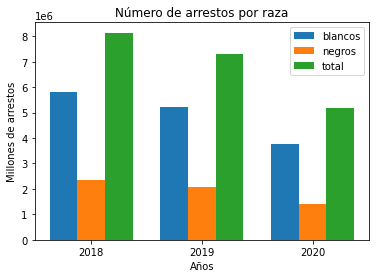

In [164]:
X = np.arange(3)

list(arrestos_w_usa.loc['usa'].values)

anos = ['2018', '2019', '2020']
X_axis = np.arange(len(anos))


plt.bar(X  - 0.25, arrestos_w_usa.loc['usa'].values ,width= 0.25, label='blancos')
plt.bar(X + 0,  arrestos_b_usa.loc['usa'].values, width= 0.25, label='negros')
plt.bar(X + 0.25,  arrestos_total_usa.loc['usa'].values, width= 0.25, label='total')

plt.xticks(X_axis, anos)

plt.xlabel('Años')
plt.ylabel('Millones de arrestos')
plt.title("Número de arrestos por raza")
plt.legend()
plt.show();


# ¿Existen grupos que tengan relacion basados en la informacion que tenemos?


In [165]:
scaler = StandardScaler()
data = df_final.drop(columns=['arrestos_w_2020', 'arrestos_b_2020', 'arrestos_total_2020',
       'arrestos_w_2019', 'arrestos_b_2019', 'arrestos_total_2019',
       'arrestos_w_2018', 'arrestos_b_2018', 'arrestos_total_2018',
       'state_name', 'poblacion_w_2020', 'poblacion_b_2020',
       'total_2020', 'poblacion_w_2019', 'poblacion_b_2019', 'total_2019',
       'poblacion_w_2018', 'poblacion_b_2018', 'total_2018'])
scaler_fit = scaler.fit_transform(data)


In [166]:
inertia = []
kmax = 10
for i in range(1,kmax):
    kmeans = KMeans(n_clusters = i, n_init = 10)
    kncl = kmeans.fit(scaler_fit)
    print(kncl.inertia_)
    
    inertia.append(kncl.inertia_)

600.0
286.84082603407967
200.49525224835764
138.45257927844153
94.81716973799303
78.18667782484813
61.78841806910512
49.552218486539964
40.00098054399158


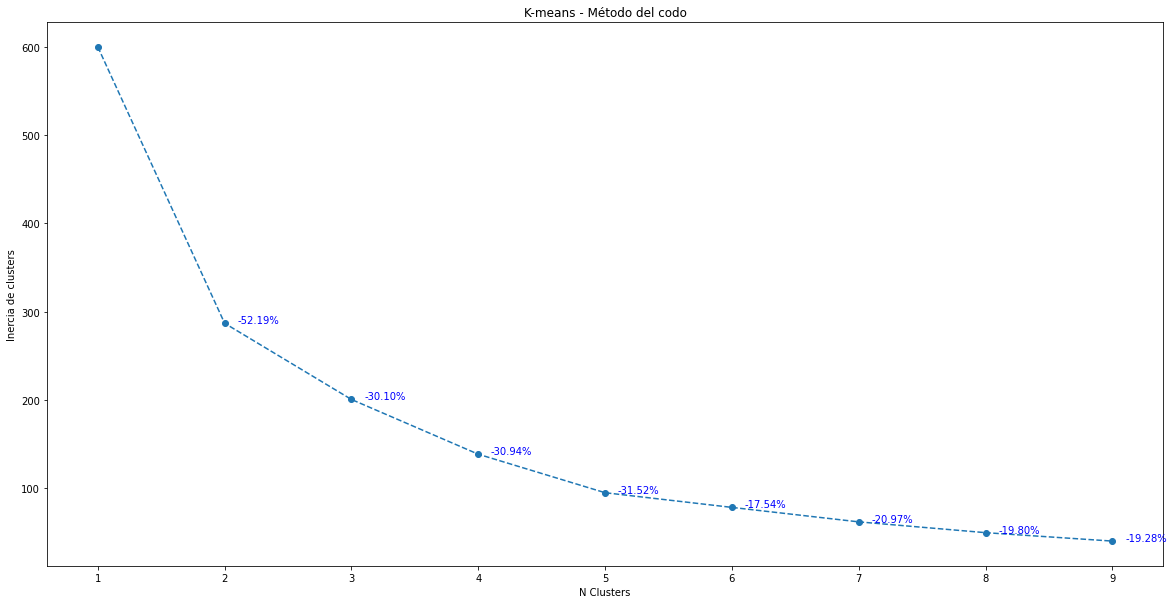

In [167]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

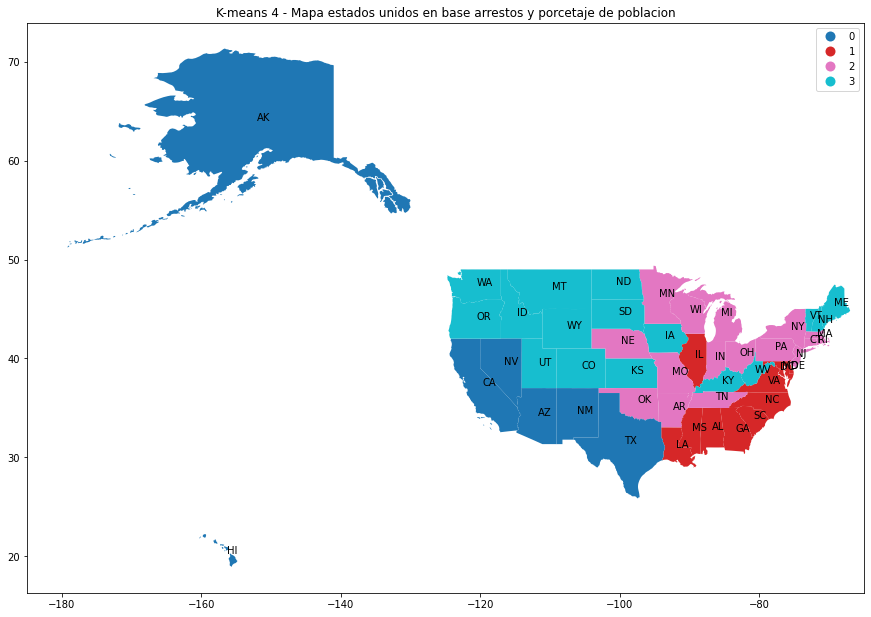

In [168]:
# 3
kmeans = KMeans(n_clusters = 4)
kncl = kmeans.fit(scaler_fit)

data['labels'] = kncl.labels_
df_mapa = pd.merge(data, states, left_on='state_abbr', right_on='STUSPS').set_index('STUSPS')

data_mapa = gpd.GeoDataFrame(df_mapa)

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
data_mapa.plot(column= 'labels', ax=ax, legend=True, categorical=True);
ax.set_title('K-means 4 - Mapa estados unidos en base arrestos y porcetaje de poblacion')

ax.set_xlim(-185, -65);

for i in data_mapa.index:
    plt.text(data_mapa.loc[i, 'geometry'].centroid.x , data_mapa.loc[i, 'geometry'].centroid.y , i)
    
plt.show()

In [169]:
kmeans = data.groupby('labels').mean()
kmeans.T

labels,0,1,2,3
porcentaje_arresto_w_2020,0.817476,0.463047,0.696740,0.892208
porcentaje_arresto_w_2019,0.824117,0.461332,0.703380,0.890659
porcentaje_arresto_w_2018,0.831175,0.457426,0.707433,0.894649
porcentaje_arresto_b_2020,0.182524,0.536953,0.303260,0.107792
porcentaje_arresto_b_2019,0.175883,0.538668,0.296620,0.109341
porcentaje_arresto_b_2018,0.168825,0.542574,0.292567,0.105351
porcentaje_w_2020,0.426913,0.568361,0.716546,0.822786
porcentaje_w_2019,0.423782,0.572152,0.720679,0.824673
porcentaje_w_2018,0.426599,0.574448,0.723750,0.826200
porcentaje_b_2020,0.054634,0.275064,0.103330,0.028068


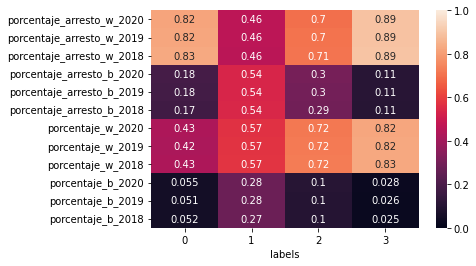

In [170]:
import seaborn as sn
sn.heatmap(kmeans.T, vmin=0, vmax= 1, annot= True);